In [1]:
from datetime import date, datetime, timedelta
import yfinance as yfin
import pandas as pd
import numpy as np
import pandas_datareader
from pandas_datareader.fred import FredReader
import rnd_stuff.tr_approx as approx
import rnd_stuff.stonks.grab as grab

import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['figure.figsize'] = [18.0, 10.0]

# UST

In [3]:
# https://fred.stlouisfed.org/series/DGS10
# Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity (DGS10) 
# Market Yield on U.S. Treasury Securities at 30-Year Constant Maturity (DGS30) 
ust = FredReader(['DGS10'], start=datetime.today() - timedelta(days=365*100)).read()
ust = ust.reindex(pd.date_range(ust.index[0], ust.index[-1])).ffill().dropna()
ust = ust / 100

In [4]:
trs = pd.DataFrame()

In [5]:
trs['ust10'] = (approx.tr(ust['DGS10'], 10.0) + 1).cumprod()

# Corp bonds


In [6]:
## https://fred.stlouisfed.org/series/BAMLCC7A01015YTRIV
## ICE BofA 10-15 Year US Corporate Index Total Return
## Index Value (BAMLCC7A01015YTRIV)
## https://fred.stlouisfed.org/series/BAMLCC3A057YTRIV
## ICE BofA 5-7 Year US Corporate Index Total Return #
## Index Value (BAMLCC3A057YTRIV)
#uscorp_ix = FredReader(
#    ['BAMLCC3A057YTRIV', 'BAMLCC7A01015YTRIV'],
#    start=datetime.today() - timedelta(days=365*100)
#).read().ffill().dropna()

In [7]:
#trs[['corp_mt', 'corp_lt']] = uscorp_ix[['BAMLCC3A057YTRIV', 'BAMLCC7A01015YTRIV']]

# Stonks

In [8]:
# Wilshire US Mid-Cap Total Market Index (WILLMIDCAP) 
# https://fred.stlouisfed.org/series/WILLMIDCAP
# Wilshire US Large-Cap Total Market Index (WILLLRGCAP) 
# https://fred.stlouisfed.org/series/WILLLRGCAP
# Wilshire US Real Estate Investment Trust Total Market Index (Wilshire US REIT) (WILLREITIND) 

# Wilshire US Small-Cap Total Market Index (WILLSMLCAP) 

df = FredReader(
    [
     #'WILLSMLCAP',
     #'WILLMIDCAP',
     'WILLLRGCAP',
    ],
    start=datetime.today() - timedelta(days=365*100)
).read().ffill().dropna()

In [9]:
#trs[['sm_cap', 'md_cap', 'lg_cap']] = df[['WILLSMLCAP', 'WILLMIDCAP', 'WILLLRGCAP']]
trs[['lg_cap']] = df[['WILLLRGCAP']]

# Gold

In [10]:
gold = grab.gold()
gold

,price
1968-12-31,41.95
1968-12-30,42.00
1968-12-27,41.70
1968-12-24,41.70
1968-12-23,41.70
...,...
2022-01-10,1800.55
2022-01-07,1792.20
2022-01-06,1804.95
2022-01-05,1818.50


In [11]:
trs['gold'] = gold['price']

# REIT

In [12]:
# Wilshire US Real Estate Investment Trust Total Market Index (Wilshire US REIT) (WILLREITIND) 
# https://fred.stlouisfed.org/series/WILLREITIND
reit = FredReader(['WILLREITIND'], start=datetime.today() - timedelta(days=365*100)).read().ffill().dropna()
reit

,WILLREITIND
DATE,
1977-12-30,100.00
1978-01-02,100.00
1978-01-03,100.00
1978-01-04,100.00
1978-01-05,100.00
...,...
2022-02-14,14330.01
2022-02-15,14438.68
2022-02-16,14523.16


In [13]:
trs['reit'] = reit['WILLREITIND']

In [14]:
trs = trs.dropna()

In [15]:
trs

,ust10,lg_cap,gold,reit
1978-06-30,2.921494,1000.00,183.20,107.95
1978-07-03,2.930170,1000.00,183.00,107.95
1978-07-04,2.931124,1000.00,185.00,107.95
1978-07-05,2.926275,1000.00,184.40,107.95
1978-07-06,2.927231,1000.00,183.45,107.95
...,...,...,...,...
2022-02-11,194.470046,146221.11,1826.25,14460.01
2022-02-14,193.462956,145686.35,1855.80,14330.01
2022-02-15,192.263165,148109.58,1855.10,14438.68
2022-02-16,192.625150,148169.46,1854.40,14523.16


In [16]:
assets = list(trs.columns)
rets_ly = [f"{v}_ly" for v in assets]
rets_ny = [f"{v}_ny" for v in assets]
assets, rets_ly, rets_ny

(['ust10', 'lg_cap', 'gold', 'reit'],
 ['ust10_ly', 'lg_cap_ly', 'gold_ly', 'reit_ly'],
 ['ust10_ny', 'lg_cap_ny', 'gold_ny', 'reit_ny'])

In [17]:
rets_cur = (trs[assets]/trs[assets].shift(365, freq='D')).dropna() - 1
rets_fut = (trs[assets].shift(-365, freq='D')/trs[assets]).dropna() - 1
trs[rets_ly] = rets_cur
trs[rets_ny] = rets_fut
#trs = trs.dropna()
trs

,ust10,lg_cap,gold,reit,ust10_ly,lg_cap_ly,gold_ly,reit_ly,ust10_ny,lg_cap_ny,gold_ny,reit_ny
1978-06-30,2.921494,1000.00,183.20,107.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-07-03,2.930170,1000.00,183.00,107.95,NaN,NaN,NaN,NaN,0.118126,0.15659,0.539891,0.3673
1978-07-04,2.931124,1000.00,185.00,107.95,NaN,NaN,NaN,NaN,0.118133,0.15659,0.531351,0.3673
1978-07-05,2.926275,1000.00,184.40,107.95,NaN,NaN,NaN,NaN,0.118158,0.15659,0.555043,0.3673
1978-07-06,2.927231,1000.00,183.45,107.95,NaN,NaN,NaN,NaN,0.116701,0.15659,0.581902,0.3673
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,194.470046,146221.11,1826.25,14460.01,-0.046283,0.126525,-0.008389,0.247003,NaN,NaN,NaN,NaN
2022-02-14,193.462956,145686.35,1855.80,14330.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-15,192.263165,148109.58,1855.10,14438.68,-0.053733,0.135374,0.020716,0.246602,NaN,NaN,NaN,NaN
2022-02-16,192.625150,148169.46,1854.40,14523.16,-0.043091,0.136916,0.016973,0.264868,NaN,NaN,NaN,NaN


<AxesSubplot:>

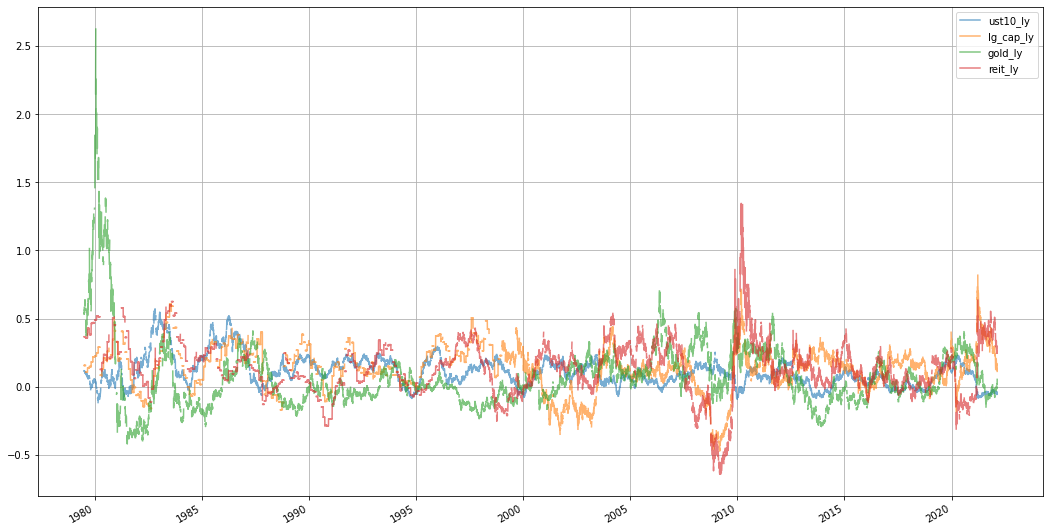

In [18]:
trs[rets_ly].plot(grid=True, alpha=0.6)

<AxesSubplot:>

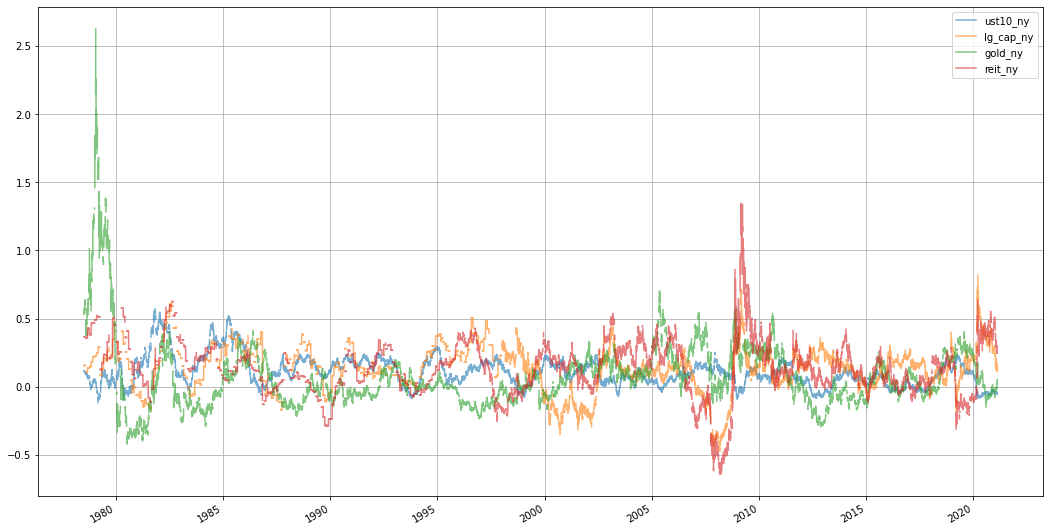

In [19]:
trs[rets_ny].plot(grid=True, alpha=0.6)

# Macroeconomic

In [20]:
# Real Gross Domestic Product (A191RL1Q225SBEA) (pct change to last period, quaterly)
# Median Consumer Price Index (MEDCPIM157SFRBCLE) (median cpi, pct change to period, monthly)
#macro = FredReader(
#    ['A191RL1Q225SBEA', 'MEDCPIM157SFRBCLE'],
#    start=datetime.today() - timedelta(days=365*100),
#).read()
#macro = macro.rename(columns={
#    'A191RL1Q225SBEA': 'gdp',
#    'MEDCPIM157SFRBCLE': 'cpi',
#})
#macro['gdp'] = macro['gdp']/100
#macro
gdp = FredReader(
    ['A191RL1Q225SBEA'],
    start=datetime.today() - timedelta(days=365*100),
).read()
gdp = gdp.rename(columns={
    'A191RL1Q225SBEA': 'gdp',
})
gdp['gdp'] = gdp['gdp']/100

cpi = FredReader(
    ['MEDCPIM157SFRBCLE'],
    start=datetime.today() - timedelta(days=365*100),
).read()
cpi = cpi.rename(columns={
    'MEDCPIM157SFRBCLE': 'cpi',
})

In [21]:
gdp['dates'] = gdp.index
cpi['dates'] = cpi.index
gdp

,gdp,dates
DATE,,
1947-04-01,-0.011,1947-04-01
1947-07-01,-0.008,1947-07-01
1947-10-01,0.064,1947-10-01
1948-01-01,0.062,1948-01-01
1948-04-01,0.068,1948-04-01
...,...,...
2020-10-01,0.045,2020-10-01
2021-01-01,0.063,2021-01-01
2021-04-01,0.067,2021-04-01


In [22]:
gdp['dates1'] = gdp['dates'].shift(1)
gdp['days'] = gdp['dates'] - gdp['dates1']
gdp['days'] = gdp['days'].dt.days

gdp = gdp.reindex(index=pd.date_range(start=gdp.index.min(), end=trs.index.max()))
gdp = gdp.ffill().dropna()
gdp['changed'] = gdp.groupby('dates').cumcount() / gdp['days']

gdp

,gdp,dates,dates1,days,changed
1947-07-01,-0.008,1947-07-01,1947-04-01,91.0,0.000000
1947-07-02,-0.008,1947-07-01,1947-04-01,91.0,0.010989
1947-07-03,-0.008,1947-07-01,1947-04-01,91.0,0.021978
1947-07-04,-0.008,1947-07-01,1947-04-01,91.0,0.032967
1947-07-05,-0.008,1947-07-01,1947-04-01,91.0,0.043956
...,...,...,...,...,...
2022-02-13,0.069,2021-10-01,2021-07-01,92.0,1.467391
2022-02-14,0.069,2021-10-01,2021-07-01,92.0,1.478261
2022-02-15,0.069,2021-10-01,2021-07-01,92.0,1.489130
2022-02-16,0.069,2021-10-01,2021-07-01,92.0,1.500000


In [23]:
cpi['dates1'] = cpi['dates'].shift(1)
cpi['days'] = cpi['dates'] - cpi['dates1']
cpi['days'] = cpi['days'].dt.days

cpi = cpi.reindex(index=pd.date_range(start=cpi.index.min(), end=trs.index.max()))
cpi = cpi.ffill().dropna()
cpi['changed'] = cpi.groupby('dates').cumcount() / cpi['days']

cpi

,cpi,dates,dates1,days,changed
1983-02-01,0.403630,1983-02-01,1983-01-01,31.0,0.000000
1983-02-02,0.403630,1983-02-01,1983-01-01,31.0,0.032258
1983-02-03,0.403630,1983-02-01,1983-01-01,31.0,0.064516
1983-02-04,0.403630,1983-02-01,1983-01-01,31.0,0.096774
1983-02-05,0.403630,1983-02-01,1983-01-01,31.0,0.129032
...,...,...,...,...,...
2022-02-13,0.576492,2022-01-01,2021-12-01,31.0,1.387097
2022-02-14,0.576492,2022-01-01,2021-12-01,31.0,1.419355
2022-02-15,0.576492,2022-01-01,2021-12-01,31.0,1.451613
2022-02-16,0.576492,2022-01-01,2021-12-01,31.0,1.483871


In [24]:
macro = pd.DataFrame(index=trs.index)
macro['gdp'] = gdp['gdp']
macro['gdp_change'] = gdp['changed']
macro['cpi'] = cpi['cpi']
macro['cpi_change'] = cpi['changed']
macro

,gdp,gdp_change,cpi,cpi_change
1978-06-30,0.164,1.000000,NaN,NaN
1978-07-03,0.041,0.021978,NaN,NaN
1978-07-04,0.041,0.032967,NaN,NaN
1978-07-05,0.041,0.043956,NaN,NaN
1978-07-06,0.041,0.054945,NaN,NaN
...,...,...,...,...
2022-02-11,0.069,1.445652,0.576492,1.322581
2022-02-14,0.069,1.478261,0.576492,1.419355
2022-02-15,0.069,1.489130,0.576492,1.451613
2022-02-16,0.069,1.500000,0.576492,1.483871


<AxesSubplot:>

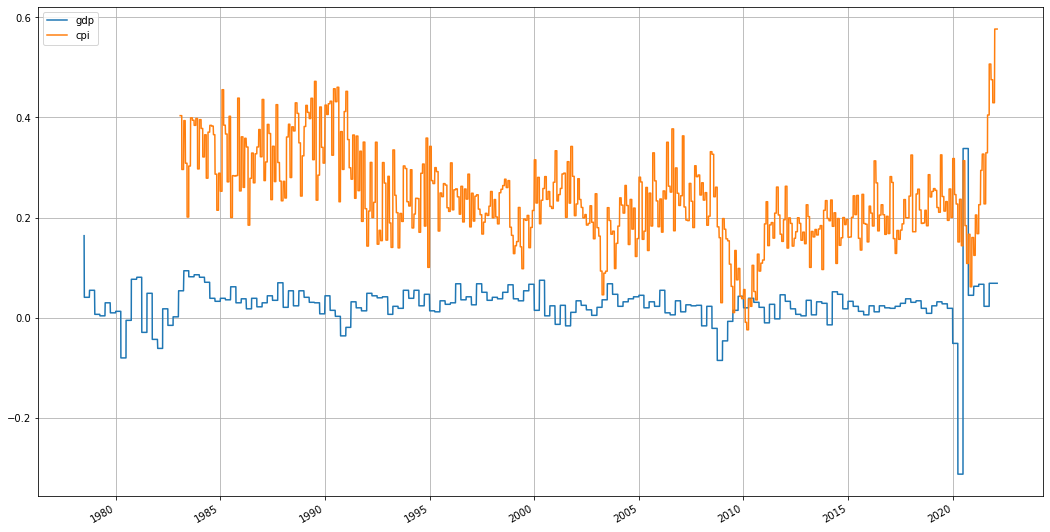

In [25]:
macro[['gdp', 'cpi']].plot(grid=True)

In [26]:
trs[['gdp', 'gdp_change', 'cpi', 'cpi_change']] = macro[['gdp', 'gdp_change', 'cpi', 'cpi_change']]
trs

,ust10,lg_cap,gold,reit,ust10_ly,lg_cap_ly,gold_ly,reit_ly,ust10_ny,lg_cap_ny,gold_ny,reit_ny,gdp,gdp_change,cpi,cpi_change
1978-06-30,2.921494,1000.00,183.20,107.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.164,1.000000,NaN,NaN
1978-07-03,2.930170,1000.00,183.00,107.95,NaN,NaN,NaN,NaN,0.118126,0.15659,0.539891,0.3673,0.041,0.021978,NaN,NaN
1978-07-04,2.931124,1000.00,185.00,107.95,NaN,NaN,NaN,NaN,0.118133,0.15659,0.531351,0.3673,0.041,0.032967,NaN,NaN
1978-07-05,2.926275,1000.00,184.40,107.95,NaN,NaN,NaN,NaN,0.118158,0.15659,0.555043,0.3673,0.041,0.043956,NaN,NaN
1978-07-06,2.927231,1000.00,183.45,107.95,NaN,NaN,NaN,NaN,0.116701,0.15659,0.581902,0.3673,0.041,0.054945,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,194.470046,146221.11,1826.25,14460.01,-0.046283,0.126525,-0.008389,0.247003,NaN,NaN,NaN,NaN,0.069,1.445652,0.576492,1.322581
2022-02-14,193.462956,145686.35,1855.80,14330.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069,1.478261,0.576492,1.419355
2022-02-15,192.263165,148109.58,1855.10,14438.68,-0.053733,0.135374,0.020716,0.246602,NaN,NaN,NaN,NaN,0.069,1.489130,0.576492,1.451613
2022-02-16,192.625150,148169.46,1854.40,14523.16,-0.043091,0.136916,0.016973,0.264868,NaN,NaN,NaN,NaN,0.069,1.500000,0.576492,1.483871


In [27]:
ds = trs[assets + rets_ly + rets_ny].copy()
ds[macro.columns] = macro
ds = ds.dropna()
ds['max'] = trs[rets_ny].max(axis=1)
ds._consolidate_inplace()
ds

,ust10,lg_cap,gold,reit,ust10_ly,lg_cap_ly,gold_ly,reit_ly,ust10_ny,lg_cap_ny,gold_ny,reit_ny,gdp,gdp_change,cpi,cpi_change,max
1983-02-01,5.423318,1954.62,508.50,318.12,0.476699,0.261672,0.333770,0.291910,0.110300,0.154142,-0.258112,0.343204,0.054,0.336957,0.40363,0.000000,0.343204
1983-02-02,5.393082,1954.62,498.25,318.12,0.459306,0.261672,0.324252,0.291910,0.119616,0.154142,-0.231811,0.343204,0.054,0.347826,0.40363,0.032258,0.343204
1983-02-03,5.379163,1954.62,506.00,318.12,0.471314,0.261672,0.335974,0.291910,0.123000,0.154142,-0.236660,0.343204,0.054,0.358696,0.40363,0.064516,0.343204
1983-02-08,5.370986,1954.62,496.50,318.12,0.479320,0.261672,0.301442,0.291910,0.119348,0.154142,-0.224673,0.343204,0.054,0.413043,0.40363,0.225806,0.343204
1983-02-09,5.369994,1954.62,492.25,318.12,0.483520,0.261672,0.302249,0.291910,0.119397,0.154142,-0.220315,0.343204,0.054,0.423913,0.40363,0.258065,0.343204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-09,203.505149,129561.57,1846.55,11477.73,0.049828,0.217168,0.173120,-0.067605,-0.046311,0.171451,-0.009992,0.301272,0.063,0.423913,0.20533,0.258065,0.301272
2021-02-10,204.090228,129559.66,1843.45,11560.22,0.055695,0.214729,0.175895,-0.061212,-0.056651,0.150481,-0.006048,0.259917,0.063,0.434783,0.20533,0.290323,0.259917
2021-02-11,203.907440,129798.34,1841.70,11595.81,0.057597,0.208901,0.175491,-0.062588,-0.046283,0.126525,-0.008389,0.247003,0.063,0.445652,0.20533,0.322581,0.247003
2021-02-16,201.299434,130325.78,1823.45,11481.96,0.040865,0.212239,0.153863,-0.089076,-0.043091,0.136916,0.016973,0.264868,0.063,0.500000,0.20533,0.483871,0.264868


In [28]:
features = [*rets_ly, 'cpi', 'cpi_change', 'gdp', 'gdp_change']

In [29]:
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [30]:
total_samples = len(ds.index)
total_samples

5679

In [31]:
total_samples * .3

1703.7

In [32]:
841 / total_samples

0.1480894523683747

In [33]:
test_ix = random.sample(list(ds.index), k=int(total_samples*.3 / 15))
test_ix_r = []
for d in test_ix:
    test_ix_r.append((d, d + pd.Timedelta('30D')))

In [34]:
test_ds = pd.DataFrame()
for d1, d2 in test_ix_r:
    test_ds = pd.concat([test_ds, ds.loc[d1:d2]])
test_ds

,ust10,lg_cap,gold,reit,ust10_ly,lg_cap_ly,gold_ly,reit_ly,ust10_ny,lg_cap_ny,gold_ny,reit_ny,gdp,gdp_change,cpi,cpi_change,max
1993-11-11,29.072287,8785.4,377.15,961.54,0.188490,0.139007,0.136165,0.268924,-0.062602,0.030408,0.021477,-0.070699,0.055,0.445652,0.29807,0.322581,0.030408
1993-11-16,29.236311,8785.4,375.25,961.54,0.192738,0.139007,0.116815,0.268924,-0.065807,0.030408,0.027315,-0.070699,0.055,0.500000,0.29807,0.483871,0.030408
1993-11-17,29.264776,8785.4,373.70,961.54,0.190177,0.139007,0.119365,0.268924,-0.070222,0.030408,0.033984,-0.070699,0.055,0.510870,0.29807,0.516129,0.033984
1993-11-18,29.117257,8785.4,374.25,961.54,0.177093,0.139007,0.115832,0.268924,-0.063956,0.030408,0.029392,-0.070699,0.055,0.521739,0.29807,0.548387,0.030408
1993-11-23,28.932850,8785.4,378.05,961.54,0.174818,0.139007,0.131040,0.268924,-0.043541,0.030408,0.017061,-0.070699,0.055,0.576087,0.29807,0.709677,0.030408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983-03-09,5.604156,2005.4,424.25,325.82,0.427784,0.366560,0.303379,0.332924,0.054946,0.084861,-0.065763,0.295869,0.054,0.728261,0.29615,0.285714,0.295869
1983-03-10,5.582555,2005.4,433.00,325.82,0.424603,0.366560,0.301277,0.332924,0.057114,0.084861,-0.071594,0.295869,0.054,0.739130,0.29615,0.321429,0.295869
1983-03-15,5.624532,2005.4,436.50,325.82,0.449155,0.366560,0.389021,0.332924,0.049850,0.084861,-0.083620,0.295869,0.054,0.793478,0.29615,0.500000,0.295869
1983-03-16,5.602828,2005.4,424.00,325.82,0.438991,0.366560,0.320872,0.332924,0.054400,0.084861,-0.070401,0.295869,0.054,0.804348,0.29615,0.535714,0.295869


In [35]:
train_ds = ds.drop(test_ds.index)
train_ds

,ust10,lg_cap,gold,reit,ust10_ly,lg_cap_ly,gold_ly,reit_ly,ust10_ny,lg_cap_ny,gold_ny,reit_ny,gdp,gdp_change,cpi,cpi_change,max
1983-02-01,5.423318,1954.62,508.50,318.12,0.476699,0.261672,0.333770,0.291910,0.110300,0.154142,-0.258112,0.343204,0.054,0.336957,0.403630,0.000000,0.343204
1983-02-02,5.393082,1954.62,498.25,318.12,0.459306,0.261672,0.324252,0.291910,0.119616,0.154142,-0.231811,0.343204,0.054,0.347826,0.403630,0.032258,0.343204
1983-02-03,5.379163,1954.62,506.00,318.12,0.471314,0.261672,0.335974,0.291910,0.123000,0.154142,-0.236660,0.343204,0.054,0.358696,0.403630,0.064516,0.343204
1983-02-08,5.370986,1954.62,496.50,318.12,0.479320,0.261672,0.301442,0.291910,0.119348,0.154142,-0.224673,0.343204,0.054,0.413043,0.403630,0.225806,0.343204
1983-02-09,5.369994,1954.62,492.25,318.12,0.483520,0.261672,0.302249,0.291910,0.119397,0.154142,-0.220315,0.343204,0.054,0.423913,0.403630,0.258065,0.343204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-07,205.127212,125452.99,1911.05,10584.81,0.091133,0.218490,0.207348,-0.098829,-0.040585,0.231356,-0.062191,0.462529,0.063,0.065217,0.124681,0.193548,0.462529
2021-01-12,203.823283,125525.28,1861.85,10577.56,0.081837,0.205312,0.200922,-0.114474,-0.032346,0.244183,-0.024411,0.462644,0.063,0.119565,0.124681,0.354839,0.462644
2021-01-13,204.796674,125759.09,1852.40,10763.70,0.083961,0.209008,0.199003,-0.094922,-0.033346,0.223526,-0.016195,0.439406,0.063,0.130435,0.124681,0.387097,0.439406
2021-02-16,201.299434,130325.78,1823.45,11481.96,0.040865,0.212239,0.153863,-0.089076,-0.043091,0.136916,0.016973,0.264868,0.063,0.500000,0.205330,0.483871,0.264868


In [36]:
X_test = test_ds[features]
y_test = test_ds[rets_ny]

In [37]:
dataset = tf.data.Dataset.from_tensor_slices((train_ds[features], train_ds[rets_ny]))
dataset = dataset.shuffle(1024).batch(1024).prefetch(tf.data.AUTOTUNE)


In [38]:
def loss(y_true, y_pred):
    ret = tf.reduce_sum(y_true * y_pred, axis=1)
    max_ret = tf.reduce_max(y_true, axis=1)
    return tf.square(ret - tf.reduce_max(y_true, axis=1))

In [39]:
def m_mean(y_true, y_pred):
    ret = tf.reduce_sum(y_true * y_pred, axis=1)
    max_ret = tf.reduce_max(y_true, axis=1)
    return tf.reduce_mean(max_ret - ret)

def m_min(y_true, y_pred):
    ret = tf.reduce_sum(y_true * y_pred, axis=1)
    max_ret = tf.reduce_max(y_true, axis=1)
    return tf.reduce_min(max_ret - ret)

def m_max(y_true, y_pred):
    ret = tf.reduce_sum(y_true * y_pred, axis=1)
    max_ret = tf.reduce_max(y_true, axis=1)
    return tf.reduce_max(max_ret - ret)

def m_std(y_true, y_pred):
    ret = tf.reduce_sum(y_true * y_pred, axis=1)
    max_ret = tf.reduce_max(y_true, axis=1)
    return tf.math.reduce_std(max_ret - ret)

In [40]:
model = keras.Sequential(
    [
        layers.Dense(len(features), activation="relu"),
        *[layers.Dense(256, activation="relu")]*16,
        layers.Dense(len(rets_ly)),
        layers.Softmax()
    ]
)
#x = tf.ones((3, 8))
#y = model(x)

In [41]:
model.compile(
    optimizer='adam',
    loss=loss,
    metrics=[m_mean, m_std, m_min, m_max],
)

In [42]:
%%time
model.fit(dataset, epochs=1024)

Epoch 1/1024
5/5 [==============================] - 1s 5ms/step - loss: 0.0262 - m_mean: 0.1455 - m_std: 0.0720 - m_min: 0.0105 - m_max: 0.4790
Epoch 2/1024
5/5 [==============================] - 0s 5ms/step - loss: 0.0256 - m_mean: 0.1434 - m_std: 0.0709 - m_min: 0.0124 - m_max: 0.4653
Epoch 3/1024
5/5 [==============================] - 0s 5ms/step - loss: 0.0252 - m_mean: 0.1418 - m_std: 0.0716 - m_min: 0.0116 - m_max: 0.4200
Epoch 4/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0248 - m_mean: 0.1411 - m_std: 0.0722 - m_min: 0.0114 - m_max: 0.4225
Epoch 5/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0245 - m_mean: 0.1382 - m_std: 0.0703 - m_min: 0.0103 - m_max: 0.4132
Epoch 6/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0243 - m_mean: 0.1376 - m_std: 0.0721 - m_min: 0.0101 - m_max: 0.4566
Epoch 7/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0241 - m_mean: 0.1368 - m_std: 0.0732 - m_min: 0.0106 - m_max:

5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - m_mean: 0.1127 - m_std: 0.0673 - m_min: 0.0045 - m_max: 0.4321
Epoch 58/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0173 - m_mean: 0.1134 - m_std: 0.0676 - m_min: 0.0037 - m_max: 0.4269
Epoch 59/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0172 - m_mean: 0.1123 - m_std: 0.0668 - m_min: 0.0026 - m_max: 0.4292
Epoch 60/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0170 - m_mean: 0.1121 - m_std: 0.0658 - m_min: 0.0040 - m_max: 0.4326
Epoch 61/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0169 - m_mean: 0.1119 - m_std: 0.0670 - m_min: 0.0029 - m_max: 0.4197
Epoch 62/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0168 - m_mean: 0.1115 - m_std: 0.0677 - m_min: 0.0032 - m_max: 0.4275
Epoch 63/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0167 - m_mean: 0.1114 - m_std: 0.0670 - m_min: 0.0035 - m_max: 0.4278

5/5 [==============================] - 0s 4ms/step - loss: 0.0123 - m_mean: 0.0917 - m_std: 0.0635 - m_min: 0.0011 - m_max: 0.4101
Epoch 114/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0123 - m_mean: 0.0918 - m_std: 0.0635 - m_min: 0.0011 - m_max: 0.4210
Epoch 115/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0123 - m_mean: 0.0909 - m_std: 0.0625 - m_min: 5.1782e-04 - m_max: 0.4205
Epoch 116/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0122 - m_mean: 0.0902 - m_std: 0.0633 - m_min: 7.9247e-04 - m_max: 0.4038
Epoch 117/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0122 - m_mean: 0.0909 - m_std: 0.0636 - m_min: 0.0013 - m_max: 0.4227
Epoch 118/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - m_mean: 0.0901 - m_std: 0.0624 - m_min: 0.0013 - m_max: 0.4201
Epoch 119/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - m_mean: 0.0901 - m_std: 0.0639 - m_min: 5.5932e-

5/5 [==============================] - 0s 4ms/step - loss: 0.0109 - m_mean: 0.0836 - m_std: 0.0637 - m_min: 0.0012 - m_max: 0.4289
Epoch 168/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0109 - m_mean: 0.0823 - m_std: 0.0633 - m_min: 1.1675e-04 - m_max: 0.4246
Epoch 169/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0108 - m_mean: 0.0823 - m_std: 0.0635 - m_min: 1.0382e-04 - m_max: 0.3977
Epoch 170/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0108 - m_mean: 0.0825 - m_std: 0.0637 - m_min: 7.7829e-05 - m_max: 0.4183
Epoch 171/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0108 - m_mean: 0.0840 - m_std: 0.0643 - m_min: 3.2240e-05 - m_max: 0.4041
Epoch 172/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0108 - m_mean: 0.0823 - m_std: 0.0646 - m_min: 3.2906e-04 - m_max: 0.4427
Epoch 173/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0108 - m_mean: 0.0817 - m_std: 0.0632 - m_m

5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - m_mean: 0.0768 - m_std: 0.0636 - m_min: 2.5916e-05 - m_max: 0.4242
Epoch 222/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - m_mean: 0.0765 - m_std: 0.0641 - m_min: 3.0243e-05 - m_max: 0.4305
Epoch 223/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - m_mean: 0.0763 - m_std: 0.0637 - m_min: 1.2776e-05 - m_max: 0.4269
Epoch 224/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - m_mean: 0.0765 - m_std: 0.0625 - m_min: 1.6716e-05 - m_max: 0.4093
Epoch 225/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0099 - m_mean: 0.0763 - m_std: 0.0641 - m_min: 1.0565e-05 - m_max: 0.4472
Epoch 226/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - m_mean: 0.0771 - m_std: 0.0653 - m_min: 4.7514e-05 - m_max: 0.4569
Epoch 227/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - m_mean: 0.0768 - m_std: 0.0641 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0092 - m_mean: 0.0725 - m_std: 0.0635 - m_min: 7.9949e-05 - m_max: 0.4432
Epoch 276/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0092 - m_mean: 0.0721 - m_std: 0.0637 - m_min: 8.0943e-06 - m_max: 0.4502
Epoch 277/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0092 - m_mean: 0.0719 - m_std: 0.0620 - m_min: 8.3715e-06 - m_max: 0.4324
Epoch 278/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0092 - m_mean: 0.0727 - m_std: 0.0626 - m_min: 2.9281e-06 - m_max: 0.4197
Epoch 279/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0092 - m_mean: 0.0728 - m_std: 0.0630 - m_min: 1.1321e-04 - m_max: 0.3920
Epoch 280/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0092 - m_mean: 0.0720 - m_std: 0.0633 - m_min: 4.5821e-05 - m_max: 0.4490
Epoch 281/1024
5/5 [==============================] - 0s 5ms/step - loss: 0.0092 - m_mean: 0.0713 - m_std: 0.0637 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0086 - m_mean: 0.0693 - m_std: 0.0620 - m_min: 7.1931e-05 - m_max: 0.4158
Epoch 330/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0086 - m_mean: 0.0689 - m_std: 0.0624 - m_min: 1.3411e-06 - m_max: 0.4338
Epoch 331/1024
5/5 [==============================] - 0s 5ms/step - loss: 0.0086 - m_mean: 0.0685 - m_std: 0.0628 - m_min: 6.1727e-05 - m_max: 0.4090
Epoch 332/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0086 - m_mean: 0.0681 - m_std: 0.0615 - m_min: 1.0312e-06 - m_max: 0.4161
Epoch 333/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0085 - m_mean: 0.0686 - m_std: 0.0614 - m_min: 2.0039e-05 - m_max: 0.4027
Epoch 334/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0085 - m_mean: 0.0684 - m_std: 0.0618 - m_min: 2.0057e-06 - m_max: 0.4479
Epoch 335/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0085 - m_mean: 0.0691 - m_std: 0.0634 -

5/5 [==============================] - 0s 3ms/step - loss: 0.0081 - m_mean: 0.0654 - m_std: 0.0603 - m_min: 6.6400e-06 - m_max: 0.3982
Epoch 384/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0081 - m_mean: 0.0663 - m_std: 0.0605 - m_min: 5.9307e-07 - m_max: 0.3896
Epoch 385/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0080 - m_mean: 0.0659 - m_std: 0.0615 - m_min: 1.7881e-07 - m_max: 0.4415
Epoch 386/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0080 - m_mean: 0.0662 - m_std: 0.0613 - m_min: 1.7583e-07 - m_max: 0.4021
Epoch 387/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0080 - m_mean: 0.0665 - m_std: 0.0617 - m_min: 2.4627e-05 - m_max: 0.4210
Epoch 388/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0080 - m_mean: 0.0656 - m_std: 0.0602 - m_min: 5.6995e-05 - m_max: 0.4298
Epoch 389/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0080 - m_mean: 0.0648 - m_std: 0.0600 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0076 - m_mean: 0.0642 - m_std: 0.0598 - m_min: 4.6343e-07 - m_max: 0.4338
Epoch 438/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0076 - m_mean: 0.0638 - m_std: 0.0589 - m_min: 3.5614e-07 - m_max: 0.4044
Epoch 439/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0076 - m_mean: 0.0638 - m_std: 0.0590 - m_min: 3.8743e-08 - m_max: 0.3693
Epoch 440/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0076 - m_mean: 0.0640 - m_std: 0.0595 - m_min: 1.4424e-06 - m_max: 0.4143
Epoch 441/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0075 - m_mean: 0.0634 - m_std: 0.0597 - m_min: 2.0117e-07 - m_max: 0.4496
Epoch 442/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0075 - m_mean: 0.0646 - m_std: 0.0595 - m_min: 4.5896e-07 - m_max: 0.3934
Epoch 443/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0075 - m_mean: 0.0633 - m_std: 0.0586 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0072 - m_mean: 0.0615 - m_std: 0.0586 - m_min: 1.9073e-07 - m_max: 0.4073
Epoch 492/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - m_mean: 0.0609 - m_std: 0.0579 - m_min: 1.8486e-05 - m_max: 0.3904
Epoch 493/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - m_mean: 0.0609 - m_std: 0.0572 - m_min: 2.3752e-06 - m_max: 0.3960
Epoch 494/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - m_mean: 0.0600 - m_std: 0.0576 - m_min: 1.1325e-07 - m_max: 0.3958
Epoch 495/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - m_mean: 0.0606 - m_std: 0.0577 - m_min: 5.6624e-08 - m_max: 0.4234
Epoch 496/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - m_mean: 0.0609 - m_std: 0.0587 - m_min: 6.6027e-06 - m_max: 0.4458
Epoch 497/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0071 - m_mean: 0.0612 - m_std: 0.0591 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0068 - m_mean: 0.0578 - m_std: 0.0569 - m_min: 3.1292e-08 - m_max: 0.3951
Epoch 546/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0068 - m_mean: 0.0585 - m_std: 0.0568 - m_min: 2.1160e-07 - m_max: 0.4058
Epoch 547/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0068 - m_mean: 0.0589 - m_std: 0.0572 - m_min: 1.4901e-07 - m_max: 0.3943
Epoch 548/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0068 - m_mean: 0.0592 - m_std: 0.0580 - m_min: 2.0862e-07 - m_max: 0.4179
Epoch 549/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0068 - m_mean: 0.0587 - m_std: 0.0579 - m_min: 1.6838e-06 - m_max: 0.4339
Epoch 550/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0068 - m_mean: 0.0581 - m_std: 0.0567 - m_min: 1.1027e-07 - m_max: 0.4109
Epoch 551/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0068 - m_mean: 0.0585 - m_std: 0.0574 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0066 - m_mean: 0.0579 - m_std: 0.0576 - m_min: 1.2249e-06 - m_max: 0.4335
Epoch 600/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0066 - m_mean: 0.0564 - m_std: 0.0575 - m_min: 5.3644e-08 - m_max: 0.4394
Epoch 601/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0066 - m_mean: 0.0559 - m_std: 0.0573 - m_min: 1.3411e-07 - m_max: 0.4351
Epoch 602/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0065 - m_mean: 0.0573 - m_std: 0.0574 - m_min: 1.1772e-06 - m_max: 0.4166
Epoch 603/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0066 - m_mean: 0.0572 - m_std: 0.0571 - m_min: 5.9605e-09 - m_max: 0.4120
Epoch 604/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0066 - m_mean: 0.0576 - m_std: 0.0585 - m_min: 3.0100e-07 - m_max: 0.4334
Epoch 605/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0065 - m_mean: 0.0574 - m_std: 0.0581 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0063 - m_mean: 0.0554 - m_std: 0.0572 - m_min: 5.2452e-07 - m_max: 0.4052
Epoch 654/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0063 - m_mean: 0.0554 - m_std: 0.0563 - m_min: 8.0466e-08 - m_max: 0.4090
Epoch 655/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0063 - m_mean: 0.0546 - m_std: 0.0555 - m_min: 1.1921e-08 - m_max: 0.3961
Epoch 656/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0063 - m_mean: 0.0555 - m_std: 0.0575 - m_min: 7.4506e-08 - m_max: 0.4243
Epoch 657/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0063 - m_mean: 0.0559 - m_std: 0.0554 - m_min: 1.1623e-07 - m_max: 0.3726
Epoch 658/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0063 - m_mean: 0.0545 - m_std: 0.0562 - m_min: 5.9605e-09 - m_max: 0.3779
Epoch 659/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0063 - m_mean: 0.0555 - m_std: 0.0568 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - m_mean: 0.0544 - m_std: 0.0558 - m_min: 1.1921e-08 - m_max: 0.3597
Epoch 708/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - m_mean: 0.0546 - m_std: 0.0562 - m_min: 3.1143e-07 - m_max: 0.3995
Epoch 709/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - m_mean: 0.0544 - m_std: 0.0559 - m_min: 2.8610e-07 - m_max: 0.3866
Epoch 710/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - m_mean: 0.0539 - m_std: 0.0556 - m_min: 2.9802e-09 - m_max: 0.3659
Epoch 711/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0061 - m_mean: 0.0544 - m_std: 0.0557 - m_min: 0.0000e+00 - m_max: 0.3453
Epoch 712/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - m_mean: 0.0535 - m_std: 0.0554 - m_min: 1.1921e-08 - m_max: 0.3714
Epoch 713/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0061 - m_mean: 0.0536 - m_std: 0.0555 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0059 - m_mean: 0.0525 - m_std: 0.0544 - m_min: 1.6987e-07 - m_max: 0.3819
Epoch 762/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0059 - m_mean: 0.0516 - m_std: 0.0552 - m_min: 5.9605e-09 - m_max: 0.4193
Epoch 763/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - m_mean: 0.0528 - m_std: 0.0557 - m_min: 2.3842e-08 - m_max: 0.4017
Epoch 764/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - m_mean: 0.0527 - m_std: 0.0553 - m_min: 2.2054e-07 - m_max: 0.3988
Epoch 765/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0059 - m_mean: 0.0533 - m_std: 0.0561 - m_min: 8.4639e-07 - m_max: 0.4024
Epoch 766/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0059 - m_mean: 0.0520 - m_std: 0.0542 - m_min: 2.5928e-07 - m_max: 0.3766
Epoch 767/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0059 - m_mean: 0.0511 - m_std: 0.0535 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0057 - m_mean: 0.0510 - m_std: 0.0536 - m_min: 3.5763e-08 - m_max: 0.3652
Epoch 816/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0057 - m_mean: 0.0513 - m_std: 0.0547 - m_min: 6.5565e-08 - m_max: 0.4018
Epoch 817/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0057 - m_mean: 0.0515 - m_std: 0.0541 - m_min: 3.5763e-08 - m_max: 0.3761
Epoch 818/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - m_mean: 0.0503 - m_std: 0.0539 - m_min: 5.9605e-09 - m_max: 0.3784
Epoch 819/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - m_mean: 0.0518 - m_std: 0.0552 - m_min: 9.8348e-08 - m_max: 0.4001
Epoch 820/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - m_mean: 0.0510 - m_std: 0.0543 - m_min: 8.6427e-08 - m_max: 0.4181
Epoch 821/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - m_mean: 0.0514 - m_std: 0.0539 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0054 - m_mean: 0.0494 - m_std: 0.0543 - m_min: 1.9073e-07 - m_max: 0.4208
Epoch 870/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0054 - m_mean: 0.0496 - m_std: 0.0536 - m_min: 1.4901e-09 - m_max: 0.4095
Epoch 871/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0054 - m_mean: 0.0499 - m_std: 0.0544 - m_min: 5.9605e-09 - m_max: 0.4187
Epoch 872/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0054 - m_mean: 0.0493 - m_std: 0.0533 - m_min: 1.7881e-07 - m_max: 0.3845
Epoch 873/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0054 - m_mean: 0.0499 - m_std: 0.0538 - m_min: 9.2387e-08 - m_max: 0.3597
Epoch 874/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0054 - m_mean: 0.0482 - m_std: 0.0529 - m_min: 1.0431e-07 - m_max: 0.3747
Epoch 875/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0054 - m_mean: 0.0500 - m_std: 0.0539 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0052 - m_mean: 0.0476 - m_std: 0.0522 - m_min: 4.4703e-09 - m_max: 0.3329
Epoch 924/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0052 - m_mean: 0.0480 - m_std: 0.0536 - m_min: 3.8743e-08 - m_max: 0.4225
Epoch 925/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0053 - m_mean: 0.0477 - m_std: 0.0533 - m_min: 6.2585e-08 - m_max: 0.3706
Epoch 926/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0052 - m_mean: 0.0479 - m_std: 0.0526 - m_min: 2.9802e-09 - m_max: 0.3941
Epoch 927/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0052 - m_mean: 0.0480 - m_std: 0.0524 - m_min: 4.7684e-08 - m_max: 0.3705
Epoch 928/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0052 - m_mean: 0.0477 - m_std: 0.0536 - m_min: 2.0862e-08 - m_max: 0.4073
Epoch 929/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0052 - m_mean: 0.0478 - m_std: 0.0522 -

5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - m_mean: 0.0464 - m_std: 0.0518 - m_min: 1.4901e-08 - m_max: 0.3712
Epoch 978/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0051 - m_mean: 0.0464 - m_std: 0.0517 - m_min: 5.9605e-09 - m_max: 0.3827
Epoch 979/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - m_mean: 0.0479 - m_std: 0.0526 - m_min: 0.0000e+00 - m_max: 0.3827
Epoch 980/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - m_mean: 0.0479 - m_std: 0.0540 - m_min: 3.2783e-08 - m_max: 0.4169
Epoch 981/1024
5/5 [==============================] - 0s 3ms/step - loss: 0.0051 - m_mean: 0.0472 - m_std: 0.0527 - m_min: 4.4703e-08 - m_max: 0.3340
Epoch 982/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - m_mean: 0.0473 - m_std: 0.0538 - m_min: 2.3842e-08 - m_max: 0.4236
Epoch 983/1024
5/5 [==============================] - 0s 4ms/step - loss: 0.0051 - m_mean: 0.0472 - m_std: 0.0524 -

In [43]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.0120 - m_mean: 0.0675 - m_std: 0.0635 - m_min: 0.0016 - m_max: 0.2038


[0.012046871706843376,
 0.06751412898302078,
 0.06348302960395813,
 0.0015904358588159084,
 0.2038300484418869]

In [44]:
preds = model.predict(X_test)
preds

array([[1.90564757e-03, 7.69876037e-03, 9.90394652e-01, 9.34873071e-07],
       [6.41605305e-03, 1.33417398e-02, 9.80241179e-01, 1.06305458e-06],
       [5.65959420e-03, 1.24333026e-02, 9.81905818e-01, 1.27027192e-06],
       ...,
       [7.27484030e-06, 9.99990821e-01, 1.92174866e-06, 4.79412676e-10],
       [8.97935388e-05, 9.99909759e-01, 5.03359445e-07, 1.10666906e-10],
       [1.03218103e-04, 9.99895930e-01, 8.02995316e-07, 1.78922890e-10]],
      dtype=float32)

In [45]:
predicted_rets = (preds * y_test).sum(axis=1)
true_rets = y_test.max(axis=1)

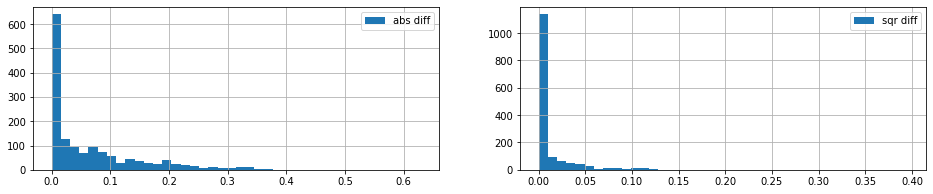

In [46]:
plt.figure(1, figsize=(16, 3))
plt.subplot(121)
plt.hist(true_rets - predicted_rets, bins=40, label='abs diff')
plt.legend()
plt.grid(True)
plt.subplot(122)
plt.hist((true_rets - predicted_rets)**2, bins=40, label='sqr diff')
plt.grid(True)
plt.legend()

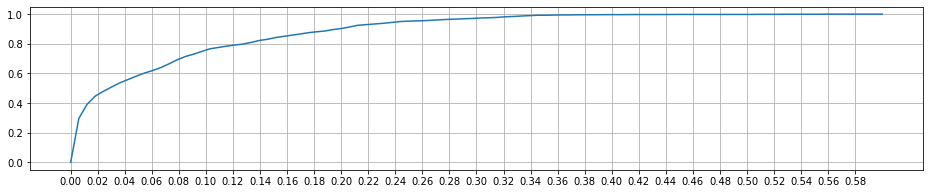

In [47]:
from scipy.stats import rv_histogram
hist_dist = rv_histogram(np.histogram(true_rets - predicted_rets, bins=100))

plt.figure(1, figsize=(16, 3))

xs = np.linspace(.0, .6, 100)
#plt.plot(xs, hist_dist.pdf(xs), label='PDF')
#plt.hist(true_rets - predicted_rets, bins=100, density=True)
plt.grid(True)
ax = plt.plot(xs, hist_dist.cdf(xs), label='PDF')
plt.xticks(np.arange(.0, .6, .02));

In [48]:
r = model.predict(trs[features].loc['20220204':])
r

array([[9.99937415e-01, 3.51326298e-06, 3.16285806e-08, 5.91829412e-05],
       [           nan,            nan,            nan,            nan],
       [9.99971747e-01, 2.14185093e-06, 8.81966944e-09, 2.60978886e-05],
       [9.99919891e-01, 3.48112394e-06, 7.26025817e-09, 7.66302546e-05],
       [9.99935269e-01, 3.71366150e-06, 1.70795500e-09, 6.10323696e-05],
       [9.99987245e-01, 1.08656423e-06, 1.80847048e-09, 1.17151476e-05],
       [           nan,            nan,            nan,            nan],
       [9.99977827e-01, 3.19261289e-06, 5.39351763e-09, 1.89754373e-05],
       [9.99987125e-01, 1.95057578e-06, 1.38059395e-08, 1.09464609e-05],
       [9.99994993e-01, 2.45053093e-06, 1.90711518e-07, 2.31060790e-06]],
      dtype=float32)

In [49]:
trs[features].loc['20220204':]

,ust10_ly,lg_cap_ly,gold_ly,reit_ly,cpi,cpi_change,gdp,gdp_change
2022-02-04,-0.048278,0.160628,0.001656,0.301234,0.576492,1.096774,0.069,1.369565
2022-02-07,NaN,NaN,NaN,NaN,0.576492,1.193548,0.069,1.402174
2022-02-08,-0.047168,0.153103,0.005161,0.276299,0.576492,1.225806,0.069,1.413043
2022-02-09,-0.046311,0.171451,-0.009992,0.301272,0.576492,1.258065,0.069,1.423913
2022-02-10,-0.056651,0.150481,-0.006048,0.259917,0.576492,1.290323,0.069,1.434783
2022-02-11,-0.046283,0.126525,-0.008389,0.247003,0.576492,1.322581,0.069,1.445652
2022-02-14,NaN,NaN,NaN,NaN,0.576492,1.419355,0.069,1.478261
2022-02-15,-0.053733,0.135374,0.020716,0.246602,0.576492,1.451613,0.069,1.489130
2022-02-16,-0.043091,0.136916,0.016973,0.264868,0.576492,1.483871,0.069,1.500000
2022-02-17,-0.038765,0.113243,0.054616,0.257689,0.576492,1.516129,0.069,1.510870


In [50]:
pd.DataFrame(r, columns=rets_ny)

,ust10_ny,lg_cap_ny,gold_ny,reit_ny
0,0.999937,0.000004,3.162858e-08,0.000059
1,NaN,NaN,NaN,NaN
2,0.999972,0.000002,8.819669e-09,0.000026
3,0.999920,0.000003,7.260258e-09,0.000077
4,0.999935,0.000004,1.707955e-09,0.000061
5,0.999987,0.000001,1.808470e-09,0.000012
6,NaN,NaN,NaN,NaN
7,0.999978,0.000003,5.393518e-09,0.000019
8,0.999987,0.000002,1.380594e-08,0.000011
9,0.999995,0.000002,1.907115e-07,0.000002


In [51]:
full_pred = model.predict(ds[features])
pred_ws = pd.DataFrame(full_pred, columns=assets, index=ds.index)

In [52]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

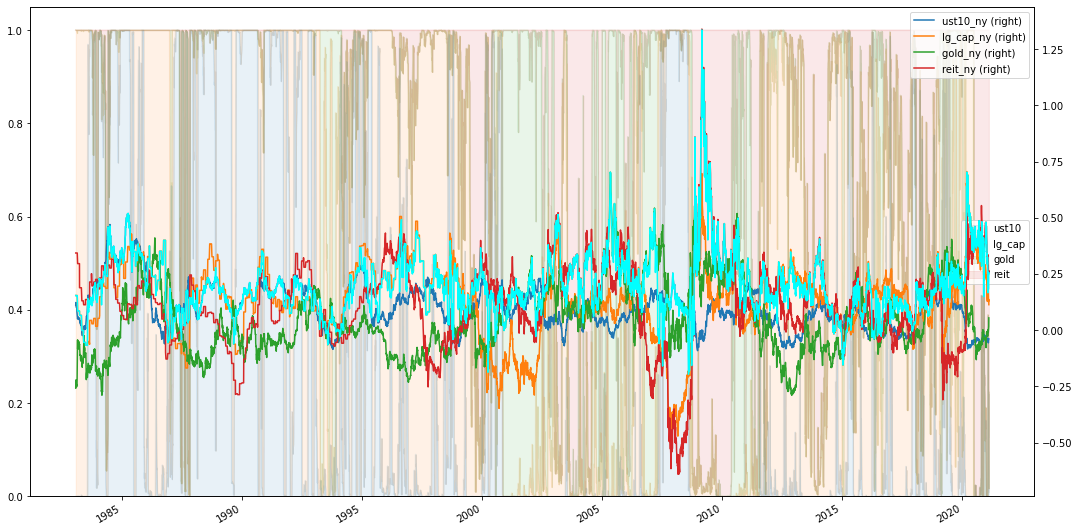

In [53]:
ax = pred_ws.plot(kind='area', alpha=0.1, color=colors, legend=False)
plt.legend(loc='best')
ds[rets_ny].plot(ax=ax, alpha=1, secondary_y=True, color=colors, legend=False)
plt.legend(loc='best')
(pred_ws * ds[rets_ny].to_numpy()).sum(axis=1).plot(
    ax=ax, alpha=1, secondary_y=True, color='cyan', style='-'
)
None

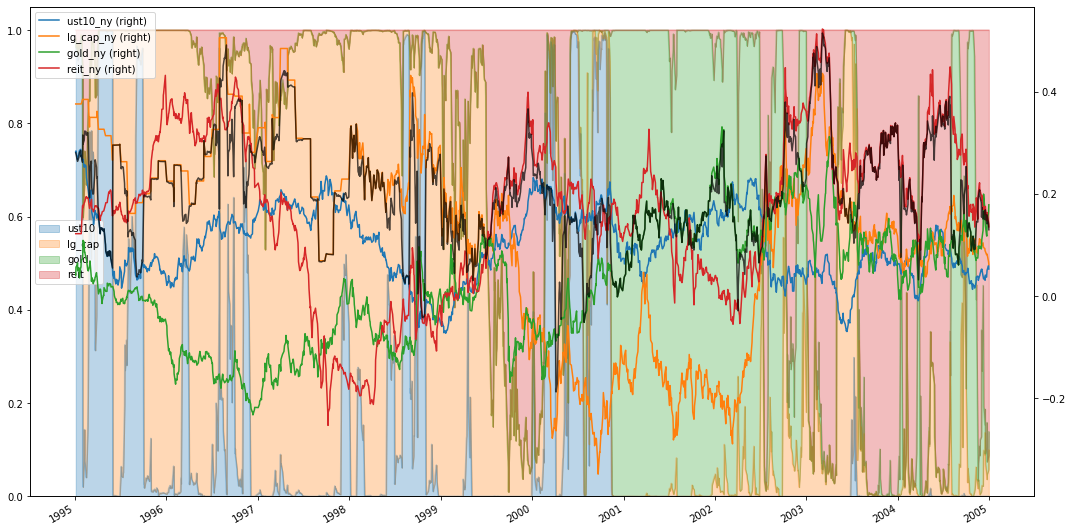

In [54]:
d1 = '19950101'
d2 = '20050101'
ax = pred_ws.loc[d1:d2].plot(kind='area', alpha=0.3, color=colors, legend=False)
plt.legend(loc='best')
ds.loc[d1:d2][rets_ny].plot(ax=ax, alpha=1, secondary_y=True, color=colors, legend=False)
plt.legend(loc='best')
#ds.loc[d1:d2][rets_ly].plot(ax=ax, alpha=1, secondary_y=True, color=colors, legend=False)
#plt.legend(loc='best')
(pred_ws.loc[d1:d2] * ds.loc[d1:d2][rets_ny].to_numpy()).sum(axis=1).plot(
    ax=ax, alpha=0.7, secondary_y=True, color='black', style='-'
)
None

In [55]:
rebal_dist = pred_ws.rolling(2).apply(np.diff).pow(2).sum(axis=1).pow(1/2)
rebal_dist

1983-02-01    0.000000
1983-02-02    0.000360
1983-02-03    0.000218
1983-02-08    0.000257
1983-02-09    0.000031
                ...   
2021-02-09    0.365907
2021-02-10    0.073246
2021-02-11    0.059467
2021-02-16    0.273043
2021-02-17    0.022559
Length: 5679, dtype: float64

<AxesSubplot:>

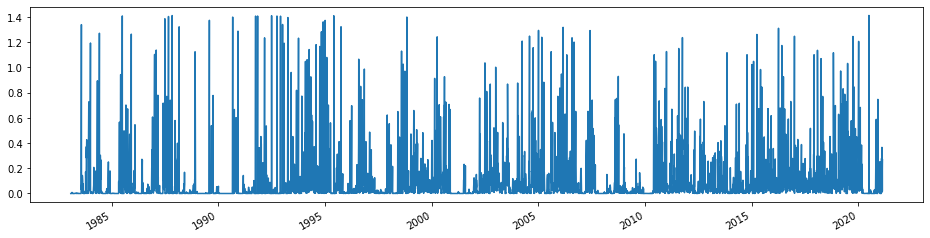

In [56]:
rebal_dist.plot(figsize=(16,4))

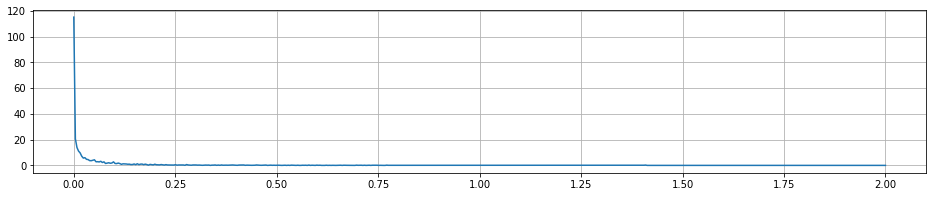

In [57]:
hist_dist = rv_histogram(np.histogram(rebal_dist, bins=512))

plt.figure(1, figsize=(16, 3))

xs = np.linspace(0.0, 2.0, 512)
plt.plot(xs, hist_dist.pdf(xs), label='PDF')
plt.grid(True)

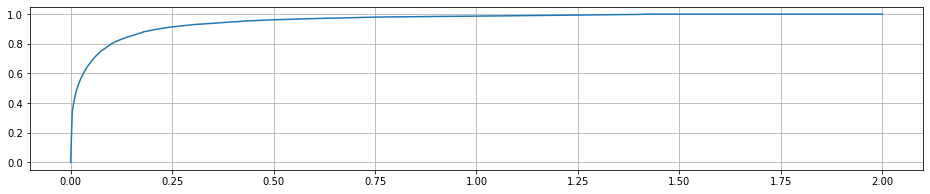

In [58]:
plt.figure(1, figsize=(16, 3))
plt.plot(xs, hist_dist.cdf(xs), label='CDF')
plt.grid(True)

In [59]:
rebal_dist.argmax(), rebal_dist.max()

(5582, 1.4125194603097877)

In [60]:
pred_ws.iloc[5581:5584]

,ust10,lg_cap,gold,reit
2020-06-30,1.051302e-12,0.999964,1.340068e-06,0.000035
2020-07-01,1.331983e-04,0.001096,1.610488e-13,0.998771
2020-07-02,5.202706e-05,0.000973,4.053843e-14,0.998975


In [66]:
trs_clean = trs[assets + features].ffill().dropna()
trs_clean

,ust10,lg_cap,gold,reit,ust10_ly,lg_cap_ly,gold_ly,reit_ly,cpi,cpi_change,gdp,gdp_change
1983-02-01,5.423318,1954.62,508.50,318.12,0.476699,0.261672,0.333770,0.291910,0.403630,0.000000,0.054,0.336957
1983-02-02,5.393082,1954.62,498.25,318.12,0.459306,0.261672,0.324252,0.291910,0.403630,0.032258,0.054,0.347826
1983-02-03,5.379163,1954.62,506.00,318.12,0.471314,0.261672,0.335974,0.291910,0.403630,0.064516,0.054,0.358696
1983-02-04,5.362129,1954.62,501.00,318.12,0.471139,0.261672,0.305537,0.291910,0.403630,0.096774,0.054,0.369565
1983-02-07,5.378404,1954.62,489.00,318.12,0.471139,0.261672,0.305537,0.291910,0.403630,0.193548,0.054,0.402174
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-11,194.470046,146221.11,1826.25,14460.01,-0.046283,0.126525,-0.008389,0.247003,0.576492,1.322581,0.069,1.445652
2022-02-14,193.462956,145686.35,1855.80,14330.01,-0.046283,0.126525,-0.008389,0.247003,0.576492,1.419355,0.069,1.478261
2022-02-15,192.263165,148109.58,1855.10,14438.68,-0.053733,0.135374,0.020716,0.246602,0.576492,1.451613,0.069,1.489130
2022-02-16,192.625150,148169.46,1854.40,14523.16,-0.043091,0.136916,0.016973,0.264868,0.576492,1.483871,0.069,1.500000


In [75]:
from rnd_stuff.stonks.dataset import Dataset
dset = Dataset(trs_clean, assets=assets, features=features)
dset

In [ ]:
s = gym.spaces.Dict({"position": gym.spaces.Discrete(2), "velocity": gym.spaces.Discrete(3)})
s

In [68]:
assets

['ust10', 'lg_cap', 'gold', 'reit']

In [76]:
%%time
dset.get_episode()

CPU times: user 1.87 ms, sys: 167 µs, total: 2.04 ms
Wall time: 1.98 ms


[{'assets': array([   56.71969385, 27783.57      ,   263.65      ,  1800.81      ]),
  'features': array([ 0.20687189, -0.09394853, -0.06573352,  0.25703097,  0.33352   ,
          0.35483871, -0.013     ,  0.11956522])},
 {'assets': array([   56.75411832, 27783.57      ,   263.35      ,  1800.81      ]),
  'features': array([ 0.20687189, -0.09394853, -0.06573352,  0.25703097,  0.33352   ,
          0.4516129 , -0.013     ,  0.15217391])},
 {'assets': array([   56.80933379, 27957.27      ,   264.5       ,  1802.14      ]),
  'features': array([ 0.21277304, -0.09874886, -0.07160407,  0.26113731,  0.33352   ,
          0.48387097, -0.013     ,  0.16304348])},
 {'assets': array([   57.04055698, 28059.93      ,   263.1       ,  1802.52      ]),
  'features': array([ 0.22265387, -0.0910795 , -0.08279589,  0.25764521,  0.33352   ,
          0.51612903, -0.013     ,  0.17391304])},
 {'assets': array([   57.36213811, 28412.61      ,   264.1       ,  1804.27      ]),
  'features': array([ 0.227

In [73]:
14 * 5000 / 1000

70.0

In [ ]:
trs[features + assets].ffill().dropna()